In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Do a `uv sync --extra examples` to install the required dependencies
import sys
import os
sys.path.append(os.path.abspath('..'))

from yanat import generative as gen
from yanat import utils as ut
from vizman import viz
import netneurotools.datasets as nntd
from scipy.spatial.distance import pdist, squareform

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/.venv/lib/python3.11/site-packages/tqdm_joblib/__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
viz.set_visual_style()
viz_sizes = viz.load_data_from_json("sizes.json")
viz_colors = viz.load_data_from_json("colors.json")
viz_cmaps = viz.give_colormaps()
sns_kwargs = {"cmap": viz_cmaps["bw_lr"],
              "xticklabels":False,
              "yticklabels":False,
              "rasterized":True}

In [4]:
human_struct = nntd.fetch_famous_gmat("human_struct_scale033")

Please cite the following papers if you are using this function:
  [primary]:
    
  [celegans]:
    Lav R Varshney, Beth L Chen, Eric Paniagua, David H Hall, and Dmitri B Chklovskii. Structural properties of the caenorhabditis elegans neuronal network. PLoS computational biology, 7(2):e1001066, 2011.
  [drosophila]:
    Ann-Shyn Chiang, Chih-Yung Lin, Chao-Chun Chuang, Hsiu-Ming Chang, Chang-Huain Hsieh, Chang-Wei Yeh, Chi-Tin Shih, Jian-Jheng Wu, Guo-Tzau Wang, Yung-Chang Chen, and others. Three-dimensional reconstruction of brain-wide wiring networks in drosophila at single-cell resolution. Current biology, 21(1):1–11, 2011.
  [human]:
    Alessandra Griffa, Yasser Alemán-Gómez, and Patric Hagmann. Structural and functional connectome from 70 young healthy adults [data set]. Zenodo, 2019.
  [macaque_markov]:
    Nikola T Markov, Maria Ercsey-Ravasz, Camille Lamy, Ana Rita Ribeiro Gomes, Loïc Magrou, Pierre Misery, Pascale Giroud, Pascal Barone, Colette Dehay, Zoltán Toroczkai, and o

In [5]:
human_struct.keys()

dict_keys(['labels', 'conn', 'coords', 'dist'])

In [6]:
connectivity = human_struct["conn"].astype(bool).astype(int)
coordinates = human_struct["coords"]

In [7]:
euclidean_distance = squareform(pdist(coordinates))

<Axes: >

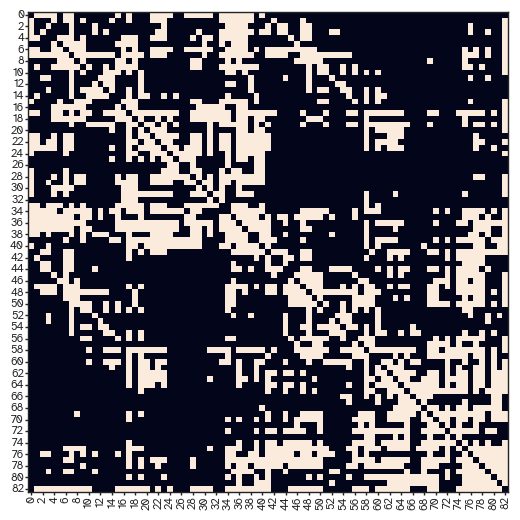

In [8]:
viz.plot_matrix(connectivity)

In [9]:
resource = (connectivity.sum(0)/connectivity.sum(0).max())

In [10]:
resource

array([0.43636364, 0.34545455, 0.29090909, 0.45454545, 0.43636364,
       0.29090909, 0.65454545, 0.83636364, 0.34545455, 0.54545455,
       0.32727273, 0.23636364, 0.2       , 0.30909091, 0.30909091,
       0.41818182, 0.30909091, 0.96363636, 0.52727273, 0.69090909,
       0.32727273, 0.50909091, 0.56363636, 0.61818182, 0.36363636,
       0.25454545, 0.10909091, 0.21818182, 0.50909091, 0.45454545,
       0.23636364, 0.43636364, 0.10909091, 0.49090909, 0.85454545,
       0.65454545, 0.92727273, 0.72727273, 0.52727273, 0.72727273,
       0.50909091, 0.67272727, 0.34545455, 0.2       , 0.52727273,
       0.32727273, 0.34545455, 0.69090909, 0.74545455, 0.41818182,
       0.56363636, 0.29090909, 0.25454545, 0.18181818, 0.30909091,
       0.34545455, 0.45454545, 0.23636364, 0.90909091, 0.41818182,
       0.58181818, 0.34545455, 0.54545455, 0.54545455, 0.56363636,
       0.45454545, 0.21818182, 0.16363636, 0.29090909, 0.54545455,
       0.54545455, 0.18181818, 0.54545455, 0.12727273, 0.54545

In [11]:
import numpy as np

In [12]:
normalized_dist_matrix = euclidean_distance * resource[:, np.newaxis] * resource[np.newaxis, :]

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


<Axes: >

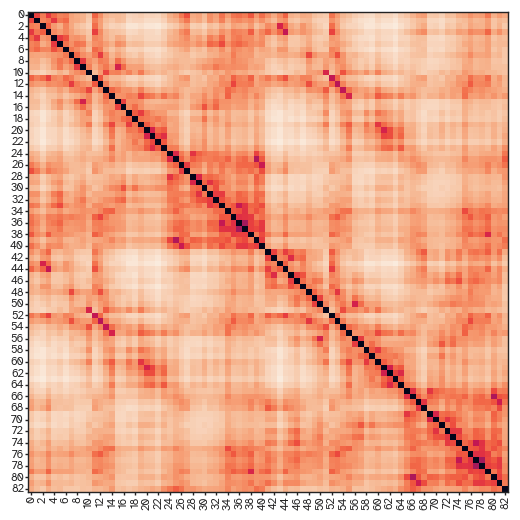

In [43]:
viz.plot_matrix(ut.log_normalize(euclidean_distance))

In [45]:
import seaborn as sns

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


<Axes: >

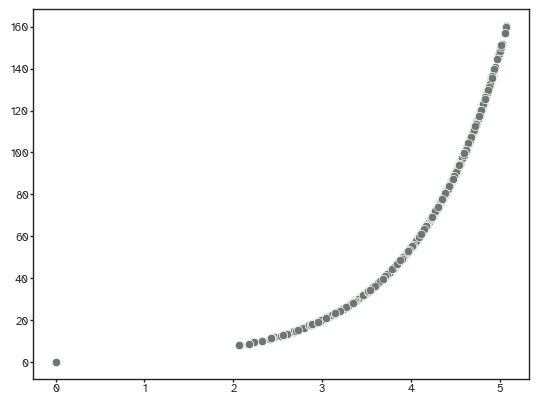

In [47]:
sns.scatterplot(x=ut.log_normalize(euclidean_distance).flatten(), y=euclidean_distance.flatten())

<Axes: >

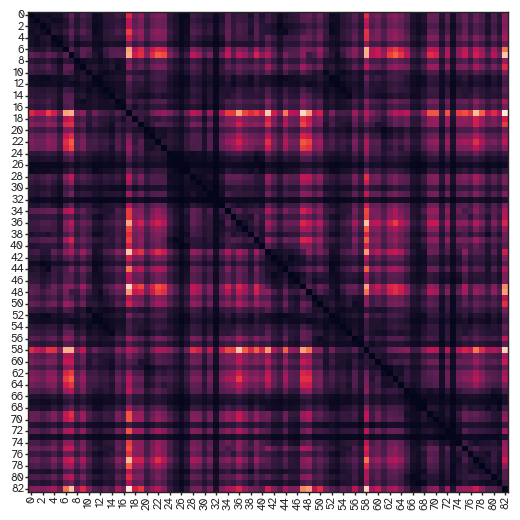

In [14]:
viz.plot_matrix(normalized_dist_matrix)

In [15]:
ut.find_density(connectivity)

np.float64(0.30976919727101176)

In [ ]:
beta_vec = np.full(n_iterations, 0)
noise_vec = np.zeros(n_iterations)
penalty_vec = np.zeros(n_iterations)
batch_size_vec = np.full(n_iterations, 10)

In [48]:
result=gen.find_optimal_alpha(
    distance_matrix=ut.log_normalize(euclidean_distance),
    empirical_connectivity=connectivity,
    distance_fn=gen.propagation_distance,
    n_iterations=500, 
    alpha_range=(1, 20.0), 
    max_search_iterations=10,
    tolerance=0.01,
    batch_size=50)

/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/utils.py:48: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)
Simulating network evolution:   0%|          | 0/499 [00:00<?, ?it/s]/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative.py:287: RuntimeWarning: divide by zero encountered in log
  return process_matrix(np.abs(-np.log(prop_matrix)))
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative.py:287: RuntimeWarning: divide by zero encountered in log
  return process_matrix(np.abs(-np.log(prop_matrix)))
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YANAT/YANAT/yanat/generative.py:287: RuntimeWarning: divide by zero encountered in log
  return process_matrix(np.abs(-np.log(prop_matrix)))
/Users/kf02/Library/Mobile Documents/com~apple~CloudDocs/Work/Projects/YAN

Initial range: alpha=[1, 20.0], density=[0.2677049662062886, 0.9991184249191889]
Target density: 0.31354687040846313
Iteration 1: Testing alpha=2.1908396946564883


Simulating network evolution: 100%|██████████| 499/499 [00:18<00:00, 26.88it/s]


Alpha=2.1908396946564883 → density=0.5010285042609463, diff from target=0.18748163385248312
Iteration 2: Testing alpha=1.2339685042398139


Simulating network evolution: 100%|██████████| 499/499 [00:18<00:00, 26.94it/s]

Alpha=1.2339685042398139 → density=0.31354687040846313, diff from target=0.0


<Axes: >

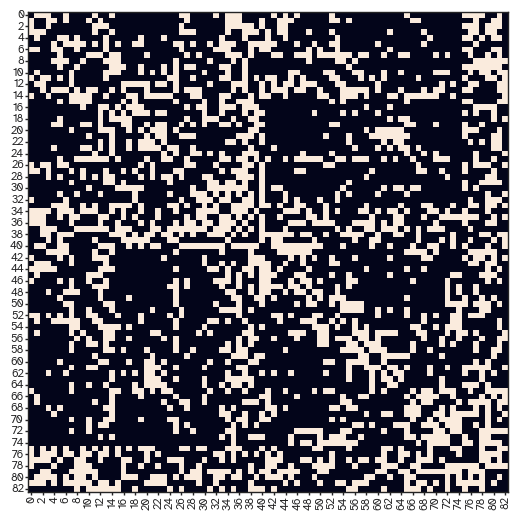

In [49]:
viz.plot_matrix(result["evolution"][...,-1])

In [21]:
import matplotlib.pyplot as plt

In [26]:
result.keys()

dict_keys(['alpha', 'density', 'evolution'])

In [30]:
result["evolution"][:,:,0].shape

(83, 83)

In [35]:
result["evolution"][:,:,2]

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]], shape=(83, 83))

In [ ]:
ut.fi

In [56]:
densities = [ut.find_density(result["evolution"][...,i]) for i in range(result["evolution"].shape[-1])]

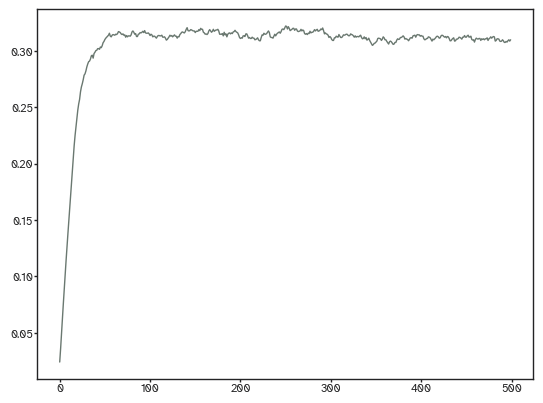

In [57]:
plt.plot(densities);

In [53]:
n_iterations = 1000
alpha_vec = np.full(n_iterations, result["alpha"])
beta_vec = np.ones(n_iterations)
noise_vec = np.zeros(n_iterations)
penalty_vec = np.zeros(n_iterations)
batch_size_vec = np.full(n_iterations, 50)
symmetric = True

In [54]:
nets = gen.simulate_network_evolution(
            distance_matrix=normalized_dist_matrix,
            n_iterations=n_iterations,
            distance_fn=gen.propagation_distance,
            alpha=alpha_vec,
            beta=1,
            noise=noise_vec,
            connectivity_penalty=penalty_vec,
            n_jobs=-1,
            random_seed=11,
            batch_size=batch_size_vec,
            symmetric=symmetric
        )

Simulating network evolution: 100%|██████████| 999/999 [00:37<00:00, 26.90it/s]


In [60]:
densities = [ut.find_density(nets[...,i]) for i in range(nets.shape[-1])]

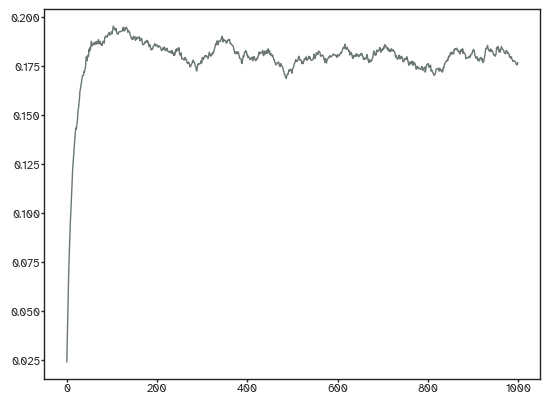

In [61]:
plt.plot(densities);

<Axes: >

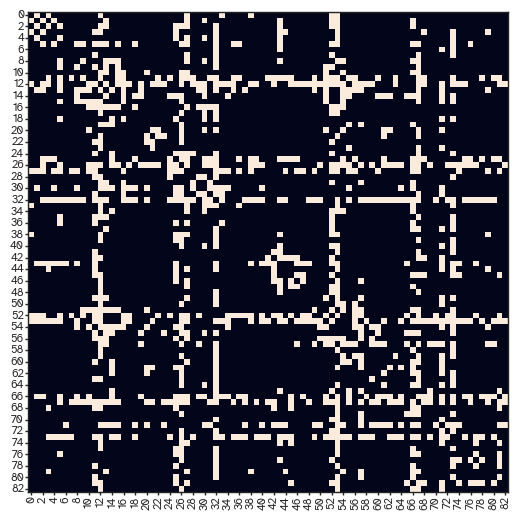

In [55]:
viz.plot_matrix(nets[...,-1])